# Regression Model Evaluation
### March 2016

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest, chi2

### define functions

In [3]:
def thumbsSum(x): 
    try:
        return int(x['thumbsup']) + int(x['thumbsdown']) 
    except:
        return 0

def sentiment(x): 
    if x['stars'] == 5:
        return 'favorable'
    if x['stars'] == 1:
        return 'unfavorable'
    else:
        return 'mixed'

### load buscape reviews

In [40]:
reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')
#reviews_features = pd.read_csv('amazon-help.csv.gz', compression='gzip')
reviews_features['thumbstotal'] = reviews_features.apply(thumbsSum,axis=1)
reviews_features['sentiment'] = reviews_features.apply(sentiment,axis=1)
reviews_features.shape

(32226, 49)

### filter dataset

In [41]:
reviews_features = reviews_features[reviews_features.thumbstotal>4]
#reviews_features = reviews_features.sample(frac=0.6)
reviews_features.shape

(9696, 49)

### split data and class

In [42]:
# split class and features
labels = reviews_features["sentiment"].values
reviews_columns = reviews_features.select_dtypes(include=['float64','int']).columns.drop('stars')
features = reviews_features[list(reviews_columns)].values

# clean features
features = np.abs(features)
features[np.isnan(features) == True] = 0

features.shape

(9696, 33)

## 1. Run 10-fold cross validation over N kbest features

In [26]:
def cv4kBest(model, feats, labs, cvOpt, loops):
    result_list = []
    for i in range(1, loops+1):
        
        kbest_features = SelectKBest(chi2, k=i).fit_transform(feats, labs)
        scores = cross_val_score(model, kbest_features, labels, cv=cvOpt, scoring = "accuracy")
        result_list.append(scores.mean())

        print str(i) + ',' + str(scores.mean())
        
    return result_list

###  1.1. for  Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()

scores_gnb = cv4kBest(gnb_model, features, labels, 5, 15)

1,0.408270078031
2,0.446031590187
3,0.458796622508
4,0.478969805905
5,0.481416917643
6,0.484392517699
7,0.481086754699
8,0.477912217116
9,0.475465105088
10,0.476390637338
11,0.471430560204
12,0.474406597967
13,0.470239690497
14,0.470041562026
15,0.464155077792


###  1.1. for Multinomial NB

In [28]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()

scores_mnb = cv4kBest(mnb_model, features, labels, 5, 15)

1,0.419312187654
2,0.392264415242
3,0.430426317309
4,0.443918753265
5,0.449937228302
6,0.425995974548
7,0.427517247975
8,0.426856003596
9,0.430096678891
10,0.431551442924
11,0.432080762205
12,0.425400386606
13,0.426789166234
14,0.427450673092
15,0.42758294821


###  1.2. forDecision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0)

scores_tree = cv4kBest(tree_model, features, labels, 5, 15)

1,0.389287218503
2,0.387500563631
3,0.389287612222
4,0.40654899295
5,0.402514994542
6,0.405689423025
7,0.399736451016
8,0.397289361329
9,0.405093156932
10,0.406415514738
11,0.409920827463
12,0.405091954229
13,0.405093747671
14,0.406878783952
15,0.410913547284


### 1.3 Plot Chart

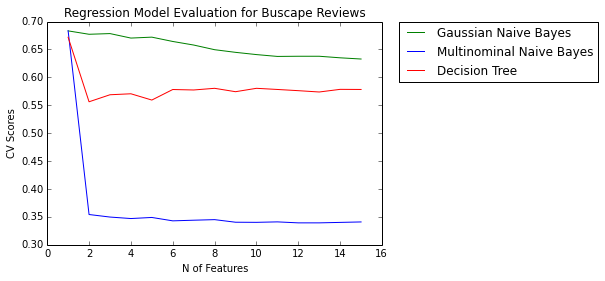

In [22]:
plt.figure()

n_features = range(1, 16)

plt.plot(n_features, scores_gnb, 'g', label='Gaussian Naive Bayes')
plt.plot(n_features, scores_mnb, 'b', label='Multinominal Naive Bayes')
plt.plot(n_features, scores_tree, 'r', label='Decision Tree')
plt.xlabel('N of Features')
plt.ylabel('CV Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Buscape Reviews')
plt.show()

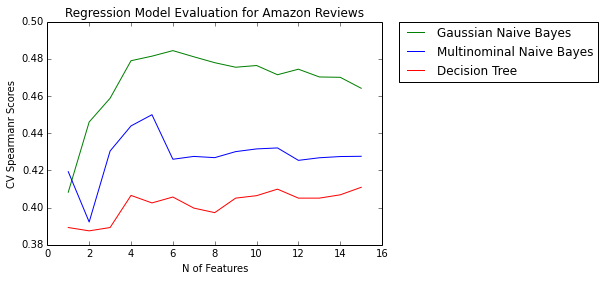

In [30]:
plt.figure()

n_features = range(1, 16)

plt.plot(n_features, scores_gnb, 'g', label='Gaussian Naive Bayes')
plt.plot(n_features, scores_mnb, 'b', label='Multinominal Naive Bayes')
plt.plot(n_features, scores_tree, 'r', label='Decision Tree')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Amazon Reviews')
plt.show()

## Naive Bayes Correlation

In [47]:
gnb_model = GaussianNB()

# split mixed subset
mixed_reviews = reviews_features[reviews_features.stars > 1]
mixed_reviews = mixed_reviews[reviews_features.stars < 5]
# split favorable subset
favorable_reviews = reviews_features[reviews_features.stars == 5]
# split unfavorable subset
unfavorable_reviews = reviews_features[reviews_features.stars == 1]

df_columns = reviews_features.select_dtypes(include=['float64','int']).columns.drop('stars')

In [44]:
#compute correlation
total_list = []

for i in df_columns:
    #compute total score
    labels = reviews_features["sentiment"].values
    features = reviews_features[list([i])].values
    scores = cross_val_score(gnb_model, features, labels, cv=5, scoring="accuracy")
    total_list.append(scores.mean())
    #print status
    print i

corr_df = pd.DataFrame(data={'total': np.array(total_list)}, index=df_columns)

ConnectiveAdditiveIncidence
redability
mean_sentence_length
percentile_75_sentence_length
percentile_75_word_length
ConnectiveLogicIncidence
percentile_90_word_length
mean_word_length
syllable_count
avg_word_per_sentence
LogicIfIncidence
percentile_50_sentence_length
median_sentence_length
LogicAndIncidence
percentile_90_sentence_length
median_word_length
pronIncidence
LogicOperatorsIncidence
percentile_25_word_length
ContentDiversty
verbIncidence
functionalIncidence
adjectiveIncidence
ConnectiveIncidence
contentIncidence
LogicNegationIncidence
avg_syllables_per_word
ConnectiveTemporalIncidence
sentence_count
ConnectiveCasualIncidence
advIncidence
LexicalDiversty
adpPronRatio


In [45]:
corr_df.sort_values('total',ascending=False)

,total
LexicalDiversty,0.697197
verbIncidence,0.688945
contentIncidence,0.686779
percentile_90_word_length,0.685540
ConnectiveIncidence,0.684509
percentile_25_word_length,0.684303
avg_syllables_per_word,0.684098
mean_word_length,0.683892
percentile_75_word_length,0.683684
syllable_count,0.683375
